# Kernel map approximation and selective learning (50 points)

1. Use SVM to predict implied volatility for two datasets: cisc5352.quiz6.option.csv and NBoption.csv by using at least four diﬀerent kernels (You need to do your own data partition)

2. Compare its running time and running results with those of original SVM, Gradient Boost, Random Forests (The classiﬁcation measure should include diagnostic index)

3. To ﬁnd best performance by learning to tuning parameters for Gradient Boost,

4. Do kernel map approximation by using RBF kernel and compare its running time and running results with SVM

5. Apply selective learning to the two datasets by choosing the Gradient Boost as the learning machine.

6. Note: you need to use plots to support all your results/conclusions

In [1]:


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors
import pandas as pd
from sklearn import svm
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from timeit import default_timer as timer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import DistanceMetric 
from sklearn.metrics import mean_squared_error 

import warnings

warnings.filterwarnings('ignore')

/Users/wusuyi/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### 1. Use SVM to predict implied volatility for two datasets: cisc5352.quiz6.option.csv and NBoption.csv by using at least four diﬀerent kernels (You need to do your own data partition)

In [2]:
# Data import 
cisc=pd.read_csv('cisc5352.quiz.6.option_data.csv')
cisc.head()

# Data Clean


cisc_label=cisc['Implied Volatility']
cisc_data=cisc[['Stock_Price','Strike_Price','Time_to_Maturity','Interest_Rate','Option_Price','Option_Type','Volatility']]

# Data Standardization
cisc_label = (cisc_label - cisc_label.mean()) / cisc_label.std()
cisc_data = (cisc_data - cisc_data.mean()) / cisc_data.std()

# Data partition

test_percent=0.4
cisc_training_data,cisc_test_data,cisc_training_data_label, cisc_test_data_label=train_test_split(cisc_data,cisc_label, test_size=test_percent, random_state=42)

# Set Kerbnel For SVM Model


kernel_list=['linear','rbf','poly','sigmoid']
print('CISC dataset\n')

result=pd.DataFrame(columns=['running time','mse'])
for kernel in kernel_list:
    clf=svm.SVR(kernel=kernel,tol=0.0001,gamma='auto')
    start=timer()
    clf.fit(cisc_training_data,cisc_training_data_label)
    predicted_label=clf.predict(cisc_test_data)
    end=timer()
    mse=mean_squared_error(cisc_test_data_label, predicted_label)
    running_time=end-start
    result.loc[kernel]={'running time':running_time,'mse':mse}
   
    
    print ("kernel is "+str(kernel))
    print ("MSE for kernel "+str(kernel)+" is "+str(mse))
    print ("The running time for kernel "+str(kernel)+" is "+str(running_time))
    print ("\n")




result


CISC dataset

kernel is linear
MSE for kernel linear is 0.6868147254391829
The running time for kernel linear is 12.607970923999998


kernel is rbf
MSE for kernel rbf is 0.4412217165221864
The running time for kernel rbf is 8.098812514999999


kernel is poly
MSE for kernel poly is 0.4860798281118697
The running time for kernel poly is 28.717475459


kernel is sigmoid
MSE for kernel sigmoid is 70436.90658925696
The running time for kernel sigmoid is 14.014713037999996




,running time,mse
linear,12.607971,0.686815
rbf,8.098813,0.441222
poly,28.717475,0.486080
sigmoid,14.014713,70436.906589


In [3]:


# ### Option Data

option=pd.read_csv('NBoption.csv')
option.head()


option['DataType']=pd.get_dummies(option['DataType'])['call']
option.head()


option_label=option['ImpliedVolatility']
option_data=option[['DataType','Ask','Bid','LastPrice','StockPrice','Strike','Volatility','Volume','time_to_maturity']]

# Data Standardization
option_label = (option_label - option_label.mean()) / option_label.std()
option_data = (option_data - option_data.mean()) / option_data.std()



test_percent=0.4
option_training_data,option_test_data,option_training_data_label, option_test_data_label=train_test_split(option_data,option_label, test_size=test_percent, random_state=42)


kernel_list=['linear','rbf','poly','sigmoid']
print('Option dataset\n')

result=pd.DataFrame(columns=['running time','mse'])
for kernel in kernel_list:
    clf=svm.SVR(kernel=kernel,tol=0.0001,gamma='auto')
    start=timer()
    clf.fit(option_training_data,option_training_data_label)
    predicted_label=clf.predict(option_test_data)
    end=timer()
    mse=mean_squared_error(option_test_data_label, predicted_label)
    running_time=end-start
    result.loc[kernel]={'running time':running_time,'mse':mse}
    score = clf.score(option_test_data,option_test_data_label)
    print ("kernel is "+str(kernel))
    print ("MSE for kernel "+str(kernel)+" is "+str(mse))
    print ("The running time for kernel "+str(kernel)+" is "+str(running_time))
    print ("Score of "+str(kernel)+" is "+str(score))
    print ("\n")




result



Option dataset

kernel is linear
MSE for kernel linear is 0.7021580970594018
The running time for kernel linear is 7.210848728000002
Score of linear is 0.2022074613645437


kernel is rbf
MSE for kernel rbf is 0.5119862485922732
The running time for kernel rbf is 2.110278270000009
Score of rbf is 0.4182808533840516


kernel is poly
MSE for kernel poly is 0.6087261976774073
The running time for kernel poly is 33.65279039399999
Score of poly is 0.3083648531395017


kernel is sigmoid
MSE for kernel sigmoid is 21668.508784444657
The running time for kernel sigmoid is 3.9716525380000007
Score of sigmoid is -24618.775381048312




,running time,mse
linear,7.210849,0.702158
rbf,2.110278,0.511986
poly,33.652790,0.608726
sigmoid,3.971653,21668.508784


### 2. Compare its running time and running results with those of original SVM, Gradient Boost, Random Forests (The classiﬁcation measure should include diagnostic index)

### Gradient Boost

In [4]:
### Option Data


time_sum_10=0.0
error=0
x=10

for i in range(x):
    option_training_data,option_test_data,option_training_data_label, option_test_data_label=train_test_split(option_data,option_label, test_size=test_percent, random_state=i)
    start=timer()
    
    GB=GradientBoostingRegressor()
    GB.fit(option_training_data,option_training_data_label)
    predicted_label=GB.predict(option_test_data)
    
    end = timer()
    time_sum_10 += (end-start)
    print("Running Time is "+str(end - start))
    print ("Total Running Time is "+ str(time_sum_10) )
    mse=mean_squared_error(option_test_data_label, predicted_label)
    error += mse
    print("MSE for GB "+" is "+str(mse))
    print("\n")

print("Average time for one GB is "+str (time_sum_10/x))
print("MSE for GB is "+str(error/x))


# In[30]:


print("The score of Gradient Boost is: ")
GB.score(option_test_data,option_test_data_label)



Running Time is 0.33891177600003175
Total Running Time is 0.33891177600003175
MSE for GB  is 0.5303069364539522


Running Time is 0.36352814899998975
Total Running Time is 0.7024399250000215
MSE for GB  is 0.5446627338107497


Running Time is 0.3533312600000045
Total Running Time is 1.055771185000026
MSE for GB  is 0.5318101725163887


Running Time is 0.3133506039999929
Total Running Time is 1.369121789000019
MSE for GB  is 0.44227567368722714


Running Time is 0.33832636299996466
Total Running Time is 1.7074481519999836
MSE for GB  is 0.5017117609938135


Running Time is 0.31569034500000726
Total Running Time is 2.023138496999991
MSE for GB  is 0.5812860564839709


Running Time is 0.3398018880000109
Total Running Time is 2.3629403850000017
MSE for GB  is 0.5478689008915436


Running Time is 0.3091461960000288
Total Running Time is 2.6720865810000305
MSE for GB  is 0.4430345011319528


Running Time is 0.3344444709999834
Total Running Time is 3.006531052000014
MSE for GB  is 0.537483902

0.5049382814939636

### Random Forests 

In [5]:
# In[31]:


time_sum_10=0.0
error=0
x=10

for i in range(x):
    ## data partition
    option_training_data,option_test_data,option_training_data_label, option_test_data_label=train_test_split(option_data,option_label, test_size=test_percent, random_state=i)
    ## calculate time 
    start =timer()
    ## Random Forest Regressor
    RF=RandomForestRegressor()
    RF.fit(option_training_data,option_training_data_label)
    predicted_label=RF.predict(option_test_data)
    
    end = timer()
    time_sum_10 += (end-start)
    print("Running Time is "+str(end - start))
    print ("Total Running Time is "+ str(time_sum_10) )
    mse=mean_squared_error(option_test_data_label, predicted_label)
    error += mse
    print("MSE for GB "+" is "+str(mse))
    print("\n")

print("Average time for one RFR is "+str (time_sum_10/x))
print ("MSE for RFR is "+str(error/x))


# In[32]:


print('The score of Random Forest Regressor is :')
RF.score(option_test_data,option_test_data_label)



Running Time is 0.4930780119999554
Total Running Time is 0.4930780119999554
MSE for GB  is 0.48382884561032624


Running Time is 0.5100670739999487
Total Running Time is 1.003145085999904
MSE for GB  is 0.48100157955266964


Running Time is 0.4821967670000049
Total Running Time is 1.485341852999909
MSE for GB  is 0.494954820692556


Running Time is 0.4683362969999507
Total Running Time is 1.9536781499998597
MSE for GB  is 0.4098091502694189


Running Time is 0.47387260499999684
Total Running Time is 2.4275507549998565
MSE for GB  is 0.47782746352259753


Running Time is 0.47788689100002557
Total Running Time is 2.905437645999882
MSE for GB  is 0.4328159309690681


Running Time is 0.5069670070000711
Total Running Time is 3.412404652999953
MSE for GB  is 0.4782373211955008


Running Time is 0.47541517100000874
Total Running Time is 3.887819823999962
MSE for GB  is 0.33737880357440386


Running Time is 0.5106843040000513
Total Running Time is 4.398504128000013
MSE for GB  is 0.49100912339

0.5470961221559283

### 3. To ﬁnd best performance by learning to tuning parameters for Gradient Boost,

Text(0.62,0.42524,'(0.62 , 0.42024038732853314)')

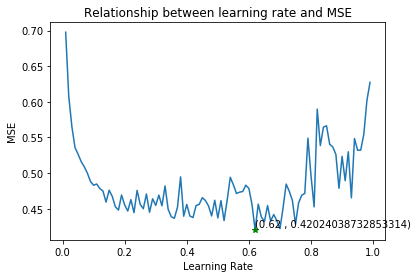

In [6]:

k_range=np.arange(0.01,1,0.01)
k_range


# In[34]:


Error=[]
for k in k_range:
    GB=GradientBoostingRegressor(learning_rate=k,random_state=42)
    GB.fit(option_training_data,option_training_data_label)
    predicted_label=GB.predict(option_test_data)
    Error.append((mean_squared_error(option_test_data_label, predicted_label)))
            




plt.figure()

plt.plot(k_range,Error)
plt.title("Relationship between learning rate and MSE")
plt.xlabel("Learning Rate")
plt.ylabel("MSE")


minimum=np.array(Error).min()
index=k_range[Error.index(minimum)]

plt.plot(index,minimum,'g*')
plt.text(index,minimum+0.005, '('+str(index)+ " , "+str(minimum)+')')

### Grid Research

In [7]:


def ML_apply(ml,X_train, X_test, y_train, y_test):
    ml.fit(X_train,y_train)
    predicted_label=ml.predict(X_test)
    return mean_squared_error(y_test,predicted_label)

def multi_opt(ML,X_train, X_test, y_train, y_test):
    Q=pd.DataFrame(columns=['n_estimators','learning_rate','mse'])
    for n in range(110,130):
        print (n)
        for k in k_range:
            MLI=ML(n_estimators=n,learning_rate=k,random_state=42)
            mse=ML_apply(MLI, X_train, X_test, y_train, y_test)
            r={'n_estimators':n,'learning_rate':k,'mse':mse}
            Q=Q.append(r,ignore_index=True)
    return Q.sort_values('mse').iloc[0]

R1=multi_opt(GradientBoostingRegressor,option_training_data,option_test_data,option_training_data_label,option_test_data_label)
print('The best learning rate for Option Data\n')
print(R1)
R2=multi_opt(GradientBoostingRegressor,cisc_training_data,cisc_test_data,cisc_training_data_label,cisc_test_data_label)
print('The best learning rate for CISC Option Data\n')
print(R2)

110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
The best learning rate for Option Data

n_estimators     119.000000
learning_rate      0.620000
mse                0.415094
Name: 952, dtype: float64
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
The best learning rate for CISC Option Data

n_estimators     129.000000
learning_rate      0.620000
mse                0.246594
Name: 1942, dtype: float64



### Question 4
#### Do kernel map approximation by using RBF kernel and compare runing time and running result with 
#### SVM

In [8]:
from sklearn.kernel_approximation import RBFSampler


n_d=50
rbf_feature=RBFSampler(n_components=n_d,gamma=1/2,random_state=1)

X_features=rbf_feature.fit_transform(option_training_data)
test_features=rbf_feature.fit_transform(option_test_data)


# Basic SVM

time_sum_10=0.0
error=0
x=10

for i in range(x):
    # data partition
    option_training_data,option_test_data,option_training_data_label, option_test_data_label=train_test_split(option_data,option_label, test_size=test_percent, random_state=i)
    # data standardlization
    # calculate time
    start = timer()
    
    clf=svm.SVR(kernel='rbf',tol=0.0001,gamma='auto')
    clf.fit(option_training_data,option_training_data_label)
    predicted_label=clf.predict(option_test_data)
    
    end = timer()
    print("Running Time is "+ str(end-start))
    time_sum_10 += (end-start)
    print("Total Running Time is "+ str(time_sum_10))
    mse=mean_squared_error(option_test_data_label, predicted_label)
    print("MSE for SVM "+" is "+str(mse))
    error += mse
    print("\n")

print("Average time for one SVM is "+str (time_sum_10/x))
print("MSE for SVM is "+str(error/x))


Running Time is 2.1497286239996356
Total Running Time is 2.1497286239996356
MSE for SVM  is 0.6352374183536238


Running Time is 2.1919799439997405
Total Running Time is 4.341708567999376
MSE for SVM  is 0.7394201385498751


Running Time is 2.1129439390001608
Total Running Time is 6.454652506999537
MSE for SVM  is 0.6473191294325841


Running Time is 2.005920794999838
Total Running Time is 8.460573301999375
MSE for SVM  is 0.5245121810889306


Running Time is 2.1106580450000365
Total Running Time is 10.571231346999411
MSE for SVM  is 0.6846751263972484


Running Time is 2.17692136200003
Total Running Time is 12.748152708999442
MSE for SVM  is 0.7040040738645795


Running Time is 2.100175910999951
Total Running Time is 14.848328619999393
MSE for SVM  is 0.6530356206339586


Running Time is 2.0452905110000756
Total Running Time is 16.89361913099947
MSE for SVM  is 0.5893019251486572


Running Time is 2.143371951000063
Total Running Time is 19.03699108199953
MSE for SVM  is 0.710798546027

### SVM with Map Approximation

In [10]:
from sklearn.linear_model import SGDRegressor

time_sum_10=0.0
error=0
x=10

for i in range(x):
    ## Data Partition
    option_training_data,option_test_data,option_training_data_label, option_test_data_label=train_test_split(option_data,option_label, test_size=test_percent, random_state=i)
    ## Map Approximation
    n_d=50
    rbf_feature=RBFSampler(n_components=n_d,gamma=1/2,random_state=1)
    X_features=rbf_feature.fit_transform(option_training_data)
    test_features=rbf_feature.fit_transform(option_test_data)
    
    start=timer()
    clf=SGDRegressor()
    clf.fit(X_features,option_training_data_label)
    predicted_label=clf.predict(test_features)
    
    end = timer()
    time_sum_10 += (end - start)
    print('Running Time is '+str(end-start))
    error += mean_squared_error(option_test_data_label, predicted_label)
    print ("MSE for SVM with map approximation "+" is "+str(mean_squared_error(option_test_data_label, predicted_label)))
    print ("\n")

print("Average time for one SVM with map approximation is "+str (time_sum_10/x))
print("MSE for SVM with approximation is "+str(error/x))

Running Time is 0.020840703999965626
MSE for SVM with map approximation  is 0.8879762240682851


Running Time is 0.014793502999964403
MSE for SVM with map approximation  is 0.9883251052705481


Running Time is 0.015467041000192694
MSE for SVM with map approximation  is 0.8907261368169364


Running Time is 0.01087787100004789
MSE for SVM with map approximation  is 0.7561066697139941


Running Time is 0.012987477000024228
MSE for SVM with map approximation  is 0.9464710521596834


Running Time is 0.010708219999742141
MSE for SVM with map approximation  is 0.9680567635900658


Running Time is 0.009820820000186359
MSE for SVM with map approximation  is 0.9013979768922118


Running Time is 0.01001591499971255
MSE for SVM with map approximation  is 0.8246001814406748


Running Time is 0.01077610399988771
MSE for SVM with map approximation  is 0.9714216763734643


Running Time is 0.009300535999955173
MSE for SVM with map approximation  is 0.8535473641310076


Average time for one SVM with map

# Baby PCA (10 points)

In [11]:


import numpy as np
from sklearn.decomposition import PCA




X = np.matrix([[1, 2, 0], [7.2, 5, 9], [-3, 100, 5.8], [1, -90, 9.7], [2, 88, 1.2]])
X_dim = X.shape
print('\n This is '+ str(X_dim) + ' Matrix. \n' + '\n'+str(X))
print('\n It has '+ str(X_dim[0]) + ' observations and ' + str(X_dim[1]) + ' variables.')

## Question 1




X_cov = np.cov(X.T, bias=False)
print("The covariance matrix of Matrix X:\n")
print(X_cov)


## Question 2




Variance, PCs = np.linalg.eig(X_cov)
print('\nThe variances of matrix X\n')
print(str(Variance.T) + '\n')





print('The first PC\n')
print(PCs[:,0])



print('The second PC \n')
print(PCs[:,1])



print('The third PC \n')
print(PCs[:,2])




print('PC matrix\n')
print(PCs)


## Question 3

O = PCs **(-1) * PCs



print(O)


## Question 4



# orthogonal matrix
print('Orthogonal matrix\n')
print(np.dot(PCs, PCs.T))
X_mean = np.mean(X,0)
X_mean_mat = np.matlib.repmat(X_mean, X_dim[0], 1)
Y = X - X_mean_mat
newData = Y * PCs
print('\n New Data\n')
print(newData)

## Question 5




# PCA sklearn
pca = PCA()
pca.fit(X)
nComp = 2
mu = np.mean(X, axis=0)
Xhat = np.dot(pca.transform(X)[:,:nComp], pca.components_[:nComp,:])
Xhat += mu
print('\n the original data from the new data \n')
print(Xhat)





 This is (5, 3) Matrix. 

[[  1.    2.    0. ]
 [  7.2   5.    9. ]
 [ -3.  100.    5.8]
 [  1.  -90.    9.7]
 [  2.   88.    1.2]]

 It has 5 observations and 3 variables.
The covariance matrix of Matrix X:

[[ 1.33480e+01 -8.70500e+01  4.33800e+00]
 [-8.70500e+01  5.91700e+03 -1.70525e+02]
 [ 4.33800e+00 -1.70525e+02  1.95180e+01]]

The variances of matrix X

[5923.21143004   11.10961613   15.54495383]

The first PC

[-0.01474307  0.99947415 -0.0288801 ]
The second PC 

[ 8.85912206e-01 -3.35232594e-04 -4.63852834e-01]
The third PC 

[0.4636186  0.03242385 0.88544141]
PC matrix

[[-1.47430660e-02  8.85912206e-01  4.63618599e-01]
 [ 9.99474153e-01 -3.35232594e-04  3.24238504e-02]
 [-2.88801049e-02 -4.63852834e-01  8.85441409e-01]]
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
Orthogonal matrix

[[ 1.00000000e+00  6.79877969e-17 -1.83221516e-15]
 [ 6.79877969e-17  1.00000000e+00  4.44635445e-17]
 [-1.83221516e-15  4.44635445e-17  1.00000000e+00]]

 New Data

[[ -18.8321296     1.82358917   -5.

# PCA Applications (40 points)


•Write a python program called demoPCA_p.py to conduct the same analysis as we did in R-version PCA analysis demoPCA.R and apply it to the two datasets. (30 points).

– Use Pandas in your implementation

– Also show the 3-PC visualization in addition to biplot (2-PC visualization)

•Suppose k PCs are selected in your PCA for the SP 2010_baby.csv data. It means i th stock will have coordinates p i1 , p i2 · · · p ik in the subspace spanned by PCs.

– 1. ﬁnd the top 20 stocks with largest PC 1 values

– 2. ﬁnd the top 20 stocks with largest PC 2 values

– 3. Find the top 20 stocks with largest PC k values

– 4. Rank each stock by their PCA ranking score % = √ p i1 2 + p i2 2 + · · · + p ik 2 , list the top-ranked 20 stocks, and describe their characteristics.

– 5. Discuss the relationships between the variables according to your PCA analysis

                         Retail  Dealer  Engine  Cylinders  Horsepower  \
Acura 3.5 RL              43755   39014     3.5          6         225   
Acura 3.5 RL Navigation   46100   41100     3.5          6         225   
Acura MDX                 36945   33337     3.5          6         265   
Acura NSX S               89765   79978     3.2          6         290   
Acura RSX                 23820   21761     2.0          4         200   

                         CityMPG  HighwayMPG  Weight  Wheelbase  Length  Width  
Acura 3.5 RL                  18          24    3880        115     197     72  
Acura 3.5 RL Navigation       18          24    3893        115     197     72  
Acura MDX                     17          23    4451        106     189     77  
Acura NSX S                   17          24    3153        100     174     71  
Acura RSX                     24          31    2778        101     172     68  
                           Retail    Dealer    Engine  Cylinders  Hor

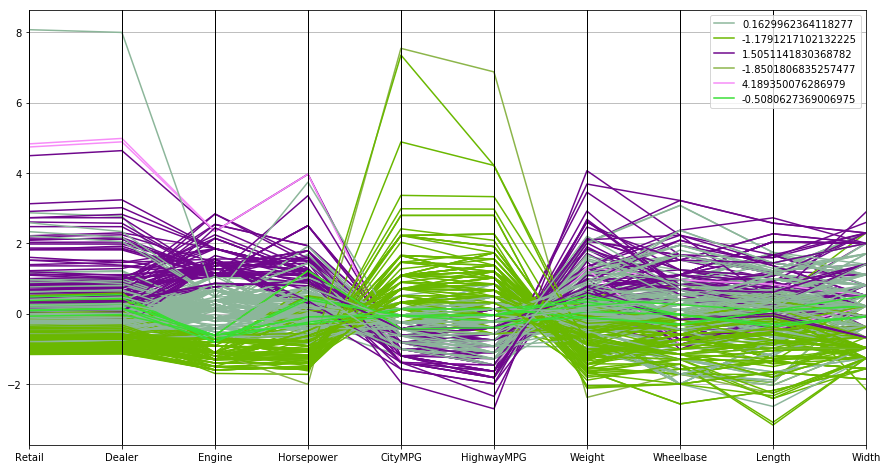

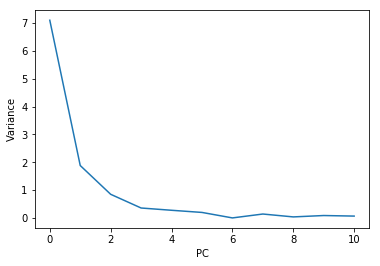

[6.45876221e-01 1.71265888e-01 7.72480259e-02 3.24559536e-02
 2.50395994e-02 1.79948832e-02 1.27744735e-02 7.87625563e-03
 6.03527097e-03 3.36157838e-03 7.18504308e-05]
[0.64587622 0.81714211 0.89439013 0.92684609 0.95188569 0.96988057
 0.98265504 0.9905313  0.99656657 0.99992815 1.        ]


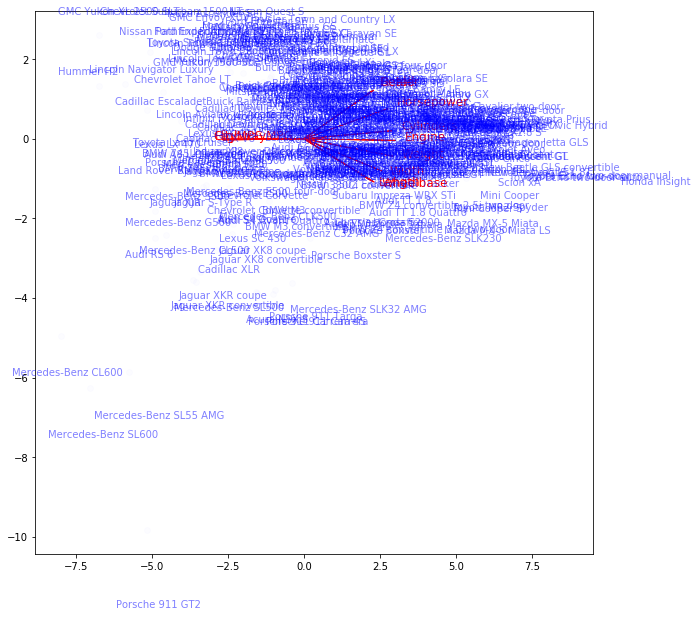

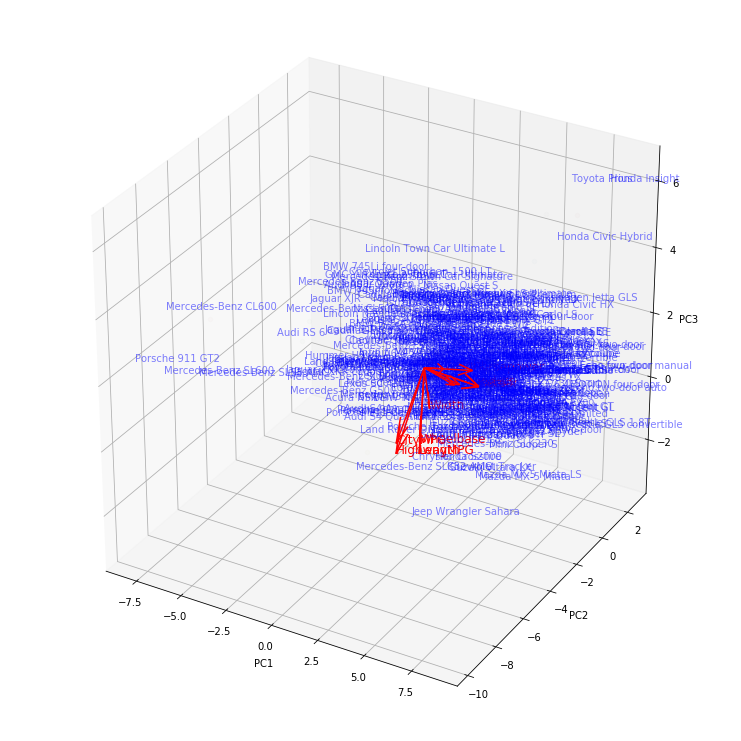

------
Name
Priceline.com Inc                       2075.296089
Intuitive Surgical Inc.                  927.546661
Chipotle Mexican Grill                   781.760114
Regeneron                                641.426533
Equinix                                  471.246577
Sherwin-Williams                         348.518898
O'Reilly Automotive                      317.877956
Intercontinental Exchange                304.423426
Public Storage                           290.241418
TransDigm Group                          281.547728
Acuity Brands Inc                        273.953917
Lockheed Martin Corp.                    263.438832
Essex Property Trust Inc                 255.205959
Bard (C.R.) Inc.                         241.894481
Grainger (W.W.) Inc.                     240.783438
Ulta Salon Cosmetics & Fragrance Inc     235.701427
Simon Property Group Inc                 219.005023
Northrop Grumman Corp.                   214.102535
McKesson Corp.                           204.894154


In [12]:


import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from sklearn import decomposition


# Question One

vehicles = pd.read_csv("vehicles.csv")
data = vehicles.iloc[:, 7:18]
print(data.head())


vehicles.head()



# drop invalid data
data = data.dropna()
data.head()


# Normalize data and rewrite the data
data = (data - data.mean()) / data.std()
name = vehicles.columns[7:18]
data = pd.DataFrame(data, columns=name)

print(data.head())


# Plot parallel coordinates
plt.figure(figsize=(15, 8))
parallel_coordinates(data, 'Cylinders')
plt.legend(loc=1)
plt.show()



#PCA analysis from BABY PCA STEPS
import numpy as np
data_cov = np.cov(data.T)
#PC's and Variance
Variance, PCs=np.linalg.eig(data_cov)
PCs_2 = PCs[:, 0:2]
#plot PC vs. Variance
plt.plot(Variance)
plt.xlabel('PC')
plt.ylabel('Variance')
plt.show()



#scores in the new coordinate system
scores = (np.dot(data,PCs)) * (-1)
scores



# explainedVarianceRatio
pca = decomposition.PCA(n_components=None)
EVR = pca.fit(data).explained_variance_ratio_
print(EVR)


# cumlative
CEVR = np.cumsum(EVR)
print(CEVR)




#keep first 5 data
reduced_data = scores[:, 0:5]

#2D-PLOT
xvector = PCs[:,0]
yvector = PCs[:,1]
xs = reduced_data[:,0]
ys = reduced_data[:,1]
# Visualize Projections
plt.figure(figsize=(10, 10))

for i in range(len(xvector)):
    # arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i] * max(xs), yvector[i] * max(ys),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(xvector[i] * max(xs) * 1.1, yvector[i] * max(ys) * 1.1,
             list(data.columns.values)[i], color='r', size='large')

for i in range(len(xs)):
    # circles project documents (ie rows from csv) as points onto PC axes
    plt.plot(xs[i], ys[i], 'bo', alpha=0.01)
    plt.text(xs[i] * 1.2, ys[i] * 1.2, list(vehicles.index)[i], color='b', alpha=0.5)

plt.show()



#3D-PLOT
from mpl_toolkits.mplot3d import Axes3D
xvector = PCs[:,0] # see 'prcomp(my_data)$rotation' in R
yvector = PCs[:,1]
zvector = PCs[:,2]

xs = reduced_data[:,0]
ys = reduced_data[:,1]
zs = reduced_data[:,2]
## visualize projections
fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig)

for i in range(len(xvector)):
    # arrows project features (ie columns from csv) as vectors onto PC axes
    ax.quiver(0, 0, 0, xvector[i], yvector[i], zvector[i],
              color='r', length=5)
    ax.text(xvector[i] * 5, yvector[i] * 5, zvector[i] * 5,
            list(data.columns.values)[i], color='r', size='large')

for i in range(len(xs)):
    # circles project documents (ie rows from csv) as points onto PC axes
    ax.scatter(xs[i], ys[i], zs[i], 'bo', alpha=0.01)
    ax.text(xs[i] * 1.2, ys[i] * 1.2, zs[i] * 1.2, list(vehicles.index)[i], color='b', alpha=0.5)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()



# In[19]:


##(2)SP_2010_BABY PROBELM

# #read csv
baby = pd.read_csv('SP_2010__baby.csv')
#only wants numerical values
data = baby.iloc[:, 3:]
pca = decomposition.PCA(n_components= None)
pca.fit(data)
column_name=['PC'+str(i) for i in range(1,9)]
new_data = pd.DataFrame(pca.transform(data),columns=column_name,index=baby['Name'])
F20PC1 = new_data['PC1'].sort_values(ascending=False)[:20]
print("------")
print(F20PC1)



F20PC2 = new_data['PC2'].sort_values(ascending=False)[:20]
print("------")
print(F20PC2)




F20PCK = ((new_data**2).sum(axis=1)**(1/2)).sort_values(ascending=False)[:20]
print("------")
print(F20PCK)



top20=(((new_data**2).sum(axis=1)**(1/2)).sort_values(ascending=False)[:20]).index
print("------")
print(new_data.loc[top20])



  Symbol                 Name                  Sector   Price  Earnings/Share  \
0    MMM           3M Company             Industrials  177.12            7.78   
1    ABT  Abbott Laboratories             Health Care   41.89            1.62   
2   ABBV               AbbVie             Health Care   64.16            3.33   
3    ACN        Accenture plc  Information Technology  115.11            5.92   
4   ATVI  Activision Blizzard  Information Technology   41.29            1.11   

   Book Value  52 week low  52 week high  Market Cap  EBITDA  Price/Sales  
0       19.34       134.00        177.79      107.43    8.57         3.52  
1       14.10        36.00         51.74       61.54    4.40         2.98  
2        2.87        45.45         71.60      103.77   10.30         4.31  
3       11.45        88.43        120.78       71.66    5.42         2.17  
4       11.31        24.04         41.32       30.48    1.59         6.16  


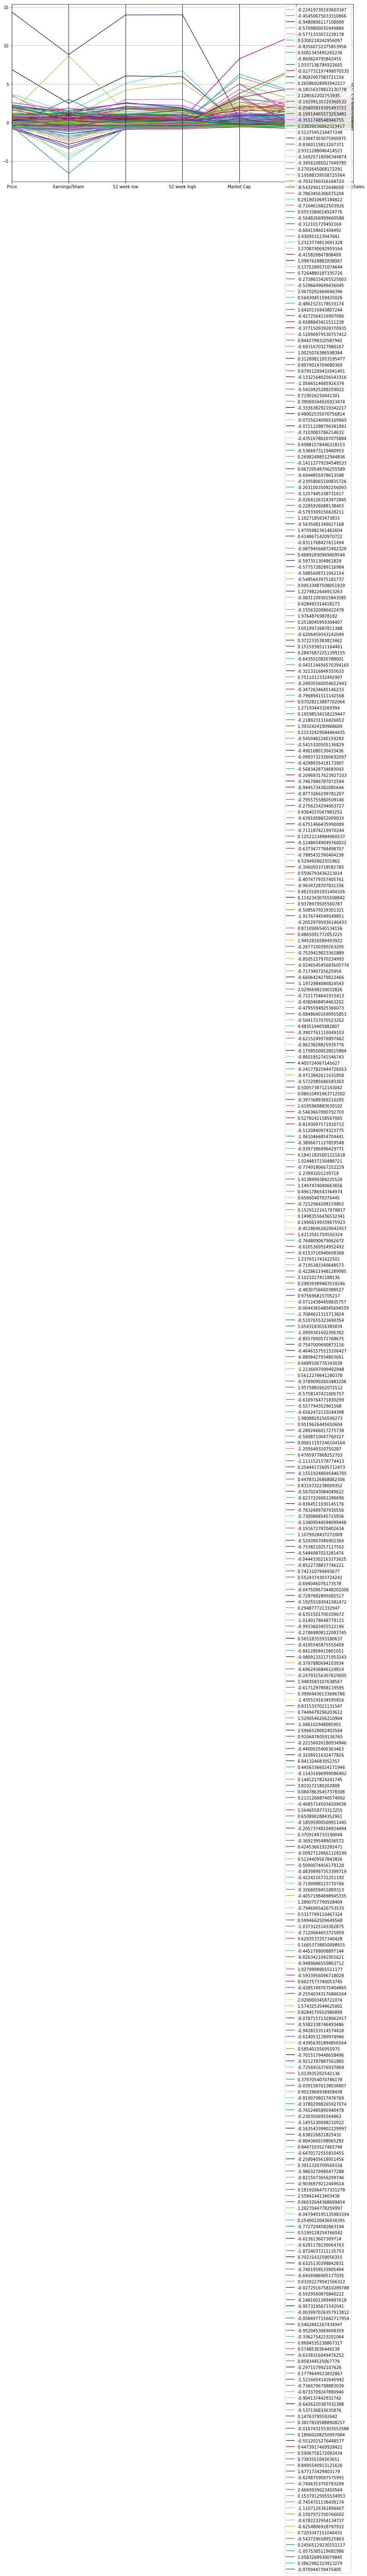

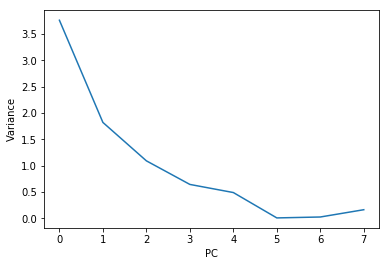

[0.46969442 0.227442   0.13638456 0.08046418 0.06121099 0.02050625
 0.00323616 0.00106143]
[0.46969442 0.69713642 0.83352098 0.91398517 0.97519616 0.99570241
 0.99893857 1.        ]


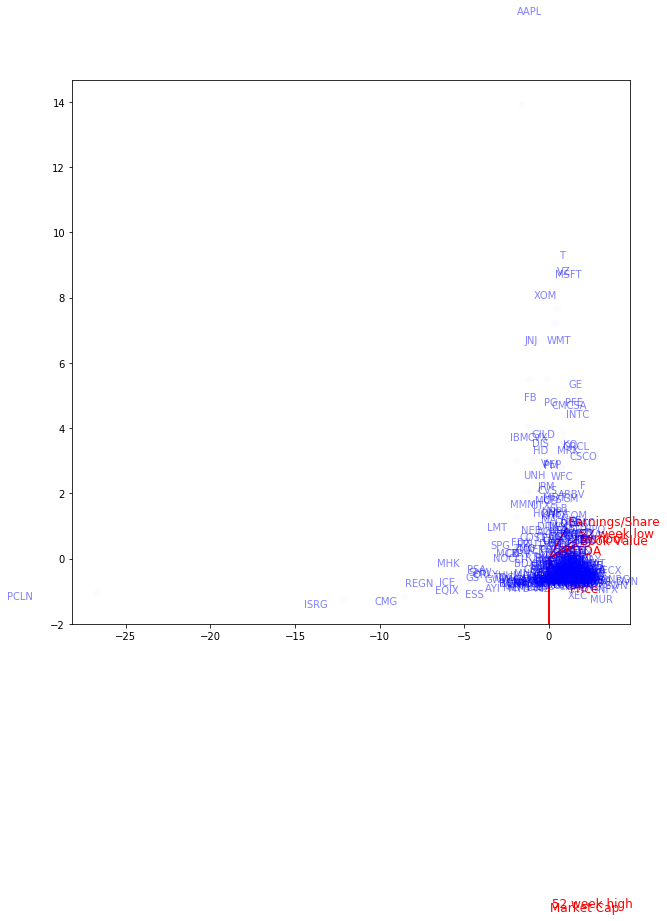

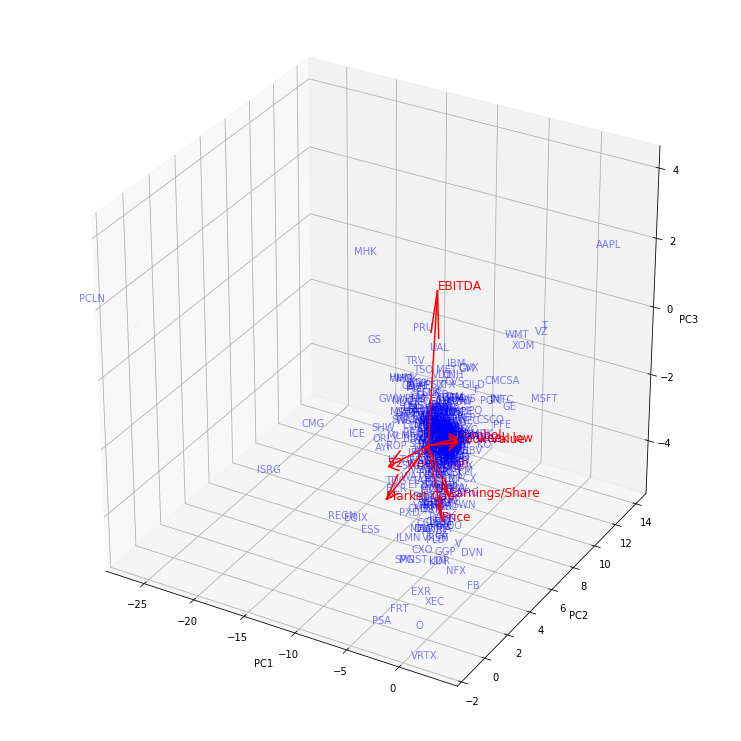

In [13]:


import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from sklearn import decomposition




sp=pd.read_csv('SP_2010__baby.csv')



print(sp.head())



data = sp[['Symbol','Price','Earnings/Share','Book Value','52 week low','52 week high','Market Cap','EBITDA','Price/Sales' ]]

data.head()




data1 = data.dropna()


data1.head()




data2 = data1.set_index('Symbol')
data2.head()




# Normalize data and rewrite the data
data3 = (data2 - data2.mean()) / data2.std()
name = data.columns[1:9]
data3 = pd.DataFrame(data3, columns=name)
data3.head()


# Plot parallel coordinates


plt.figure(figsize=(15, 8))
parallel_coordinates(data3, 'Book Value')
plt.show()


#PCA analysis from BABY PCA STEPS
import numpy as np
data_cov = np.cov(data3.T)
#PC's and Variance
Variance, PCs=np.linalg.eig(data_cov)
PCs_2 = PCs[:, 0:2]
#plot PC vs. Variance
plt.plot(Variance)
plt.xlabel('PC')
plt.ylabel('Variance')
plt.show()



#scores in the new coordinate system
scores = (np.dot(data3,PCs)) * (-1)
scores



## explainedVarianceRatio
pca = decomposition.PCA(n_components=None)
EVR = pca.fit(data3).explained_variance_ratio_
print(EVR)


# cumlative
CEVR = np.cumsum(EVR)
print(CEVR)


#keep first 5 data
reduced_data = scores[:, 0:5]
reduced_data




#2D-PLOT
xvector = PCs[:,0]
yvector = PCs[:,1]
xs = reduced_data[:,0]
ys = reduced_data[:,1]
# Visualize Projections
plt.figure(figsize=(10, 10))

for i in range(len(xvector)):
    # arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i] * max(xs), yvector[i] * max(ys),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(xvector[i] * max(xs) * 1.1, yvector[i] * max(ys) * 1.1,
             list(data.columns.values)[i], color='r', size='large')

for i in range(len(xs)):
    # circles project documents (ie rows from csv) as points onto PC axes
    plt.plot(xs[i], ys[i], 'bo', alpha=0.01)
    plt.text(xs[i] * 1.2, ys[i] * 1.2, list(data2.index)[i], color='b', alpha=0.5)

plt.show()


#3D-PLOT
from mpl_toolkits.mplot3d import Axes3D
xvector = PCs[:,0] # see 'prcomp(my_data)$rotation' in R
yvector = PCs[:,1]
zvector = PCs[:,2]

xs = reduced_data[:,0]
ys = reduced_data[:,1]
zs = reduced_data[:,2]
## visualize projections
fig = plt.figure(figsize=(10, 10))
ax = Axes3D(fig)

for i in range(len(xvector)):
    # arrows project features (ie columns from csv) as vectors onto PC axes
    ax.quiver(0, 0, 0, xvector[i], yvector[i], zvector[i],
              color='r', length=5)
    ax.text(xvector[i] * 5, yvector[i] * 5, zvector[i] * 5,
            list(data.columns.values)[i], color='r', size='large')

for i in range(len(xs)):
    # circles project documents (ie rows from csv) as points onto PC axes
    ax.scatter(xs[i], ys[i], zs[i], 'bo', alpha=0.01)
    ax.text(xs[i] * 1.2, ys[i] * 1.2, zs[i] * 1.2, list(data2.index)[i], color='b', alpha=0.5)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

